In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [80]:
df = pd.read_json("../results/2022-06-07T23:31:37Z/pt-p0d1/output.json")

In [81]:
sum = df.iloc[-1:]
sum2 = pd.json_normalize(sum.OS)
sum2.MaxOpenConns

0    2048
Name: MaxOpenConns, dtype: int64

In [82]:
df = df.loc[df['ElpsdNs'] > 0]

In [83]:
df

,Start,Stop,ElpsdNs,ReqBytes,ResCode,ResBytes,ResErr,ID,Time,Config,OS,ReqStats,Output,Interrupted
0,2022-06-07T23:31:50.775678508Z,2022-06-07T23:31:50.776082048Z,403545.0,6933.0,200.0,305.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-06-07T23:31:50.778626616Z,2022-06-07T23:31:50.779049679Z,423051.0,6933.0,200.0,305.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-06-07T23:31:50.783388031Z,2022-06-07T23:31:50.783769499Z,381470.0,6933.0,200.0,305.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-06-07T23:31:50.783773278Z,2022-06-07T23:31:50.7841684Z,395125.0,6933.0,200.0,305.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-06-07T23:31:50.79513134Z,2022-06-07T23:31:50.795511181Z,379857.0,6933.0,200.0,305.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368687,2022-06-07T23:41:50.764058514Z,2022-06-07T23:41:50.764681084Z,622582.0,6933.0,200.0,294.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368688,2022-06-07T23:41:50.764845519Z,2022-06-07T23:41:50.765314974Z,469455.0,6933.0,200.0,294.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368689,2022-06-07T23:41:50.764995806Z,2022-06-07T23:41:50.767848491Z,2852705.0,6933.0,200.0,294.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368690,2022-06-07T23:41:50.764501904Z,2022-06-07T23:41:50.768098933Z,3597047.0,6933.0,200.0,294.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df['ElpsdMs'] = df.apply(lambda row: row.ElpsdNs/1000000, axis=1)
df

,Start,Stop,ElpsdNs,ReqBytes,ResCode,ResBytes,ResErr,ID,Time,Config,OS,ReqStats,Output,Interrupted,ElpsdMs
0,2022-06-07T23:31:50.775678508Z,2022-06-07T23:31:50.776082048Z,403545.0,6933.0,200.0,305.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.403545
1,2022-06-07T23:31:50.778626616Z,2022-06-07T23:31:50.779049679Z,423051.0,6933.0,200.0,305.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.423051
2,2022-06-07T23:31:50.783388031Z,2022-06-07T23:31:50.783769499Z,381470.0,6933.0,200.0,305.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.381470
3,2022-06-07T23:31:50.783773278Z,2022-06-07T23:31:50.7841684Z,395125.0,6933.0,200.0,305.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.395125
4,2022-06-07T23:31:50.79513134Z,2022-06-07T23:31:50.795511181Z,379857.0,6933.0,200.0,305.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.379857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368687,2022-06-07T23:41:50.764058514Z,2022-06-07T23:41:50.764681084Z,622582.0,6933.0,200.0,294.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.622582
368688,2022-06-07T23:41:50.764845519Z,2022-06-07T23:41:50.765314974Z,469455.0,6933.0,200.0,294.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.469455
368689,2022-06-07T23:41:50.764995806Z,2022-06-07T23:41:50.767848491Z,2852705.0,6933.0,200.0,294.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.852705
368690,2022-06-07T23:41:50.764501904Z,2022-06-07T23:41:50.768098933Z,3597047.0,6933.0,200.0,294.0,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.597047


In [85]:
pct50 = df['ElpsdMs'].quantile(.7)
pct50

364.4224619

<AxesSubplot:xlabel='Start'>

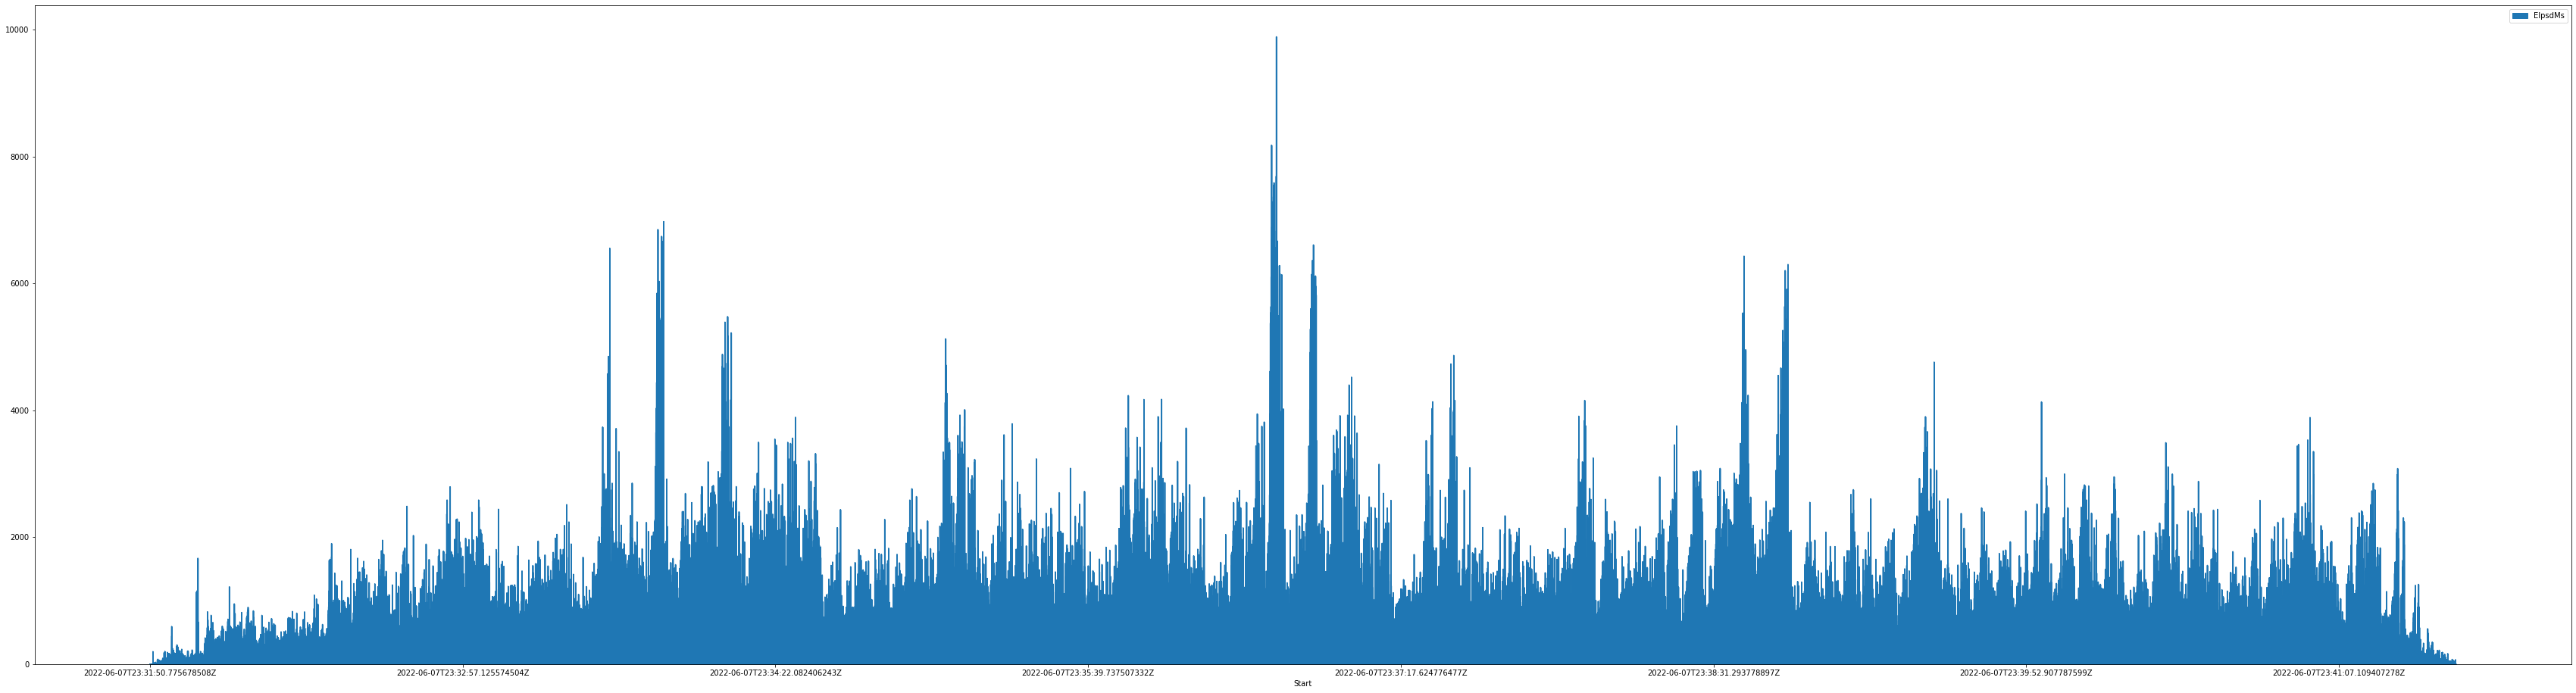

In [86]:
from matplotlib.pyplot import figure

p = df.plot
p.area(y='ElpsdMs', x='Start', figsize=(60,16))